In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
set.seed(301)

m <- 800
lambda_not_contaminated <- 3.13
lambda_contaminated <- 0.53
alpha <- 1 - 0.94
dimensions <- seq(100, 2500, 100)
epsilon <- 0.25

calculate_mean_widths <- function(n) {
  not_contaminated <- c()
  contaminated <- c()
  for (i in 1:m) {
    contaminated_amount <- floor(n * epsilon)
    nc_exp <- rexp(n, rate=lambda_not_contaminated)
    c_exp <- rexp(contaminated_amount, rate=lambda_contaminated)
    c_exp <- c(c_exp[0:contaminated_amount], nc_exp[contaminated_amount:n])

    nc_upper_bound <- ((1 + qnorm(1-alpha/2)/sqrt(n))/mean(nc_exp))
    nc_lower_bound <- ((1 - qnorm(1-alpha/2)/sqrt(n))/mean(nc_exp))
    c_upper_bound <- ((1 + qnorm(1-alpha/2)/sqrt(n))/mean(c_exp))
    c_lower_bound <- ((1 - qnorm(1-alpha/2)/sqrt(n))/mean(c_exp))
    not_contaminated <- c(not_contaminated, abs(nc_upper_bound - nc_lower_bound))
    contaminated <- c(contaminated, abs(c_upper_bound - c_lower_bound))
  }
  return(c(mean(not_contaminated), mean(contaminated)))
}

not_contaminated <- c()
contaminated <- c()
for (n in dimensions) {
  mean_widths <- calculate_mean_widths(n)
  not_contaminated <- c(not_contaminated, mean_widths[1])
  contaminated <- c(contaminated, mean_widths[2])
}


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df = data.frame(dimensions, not_contaminated, contaminated)
df <- rename(df, "Não Contaminado" = "not_contaminated", "Contaminado" = "contaminated")
df <- pivot_longer(df, "Não Contaminado":"Contaminado")
df <- rename(df, "Amostra" = name, mean_widths = value)

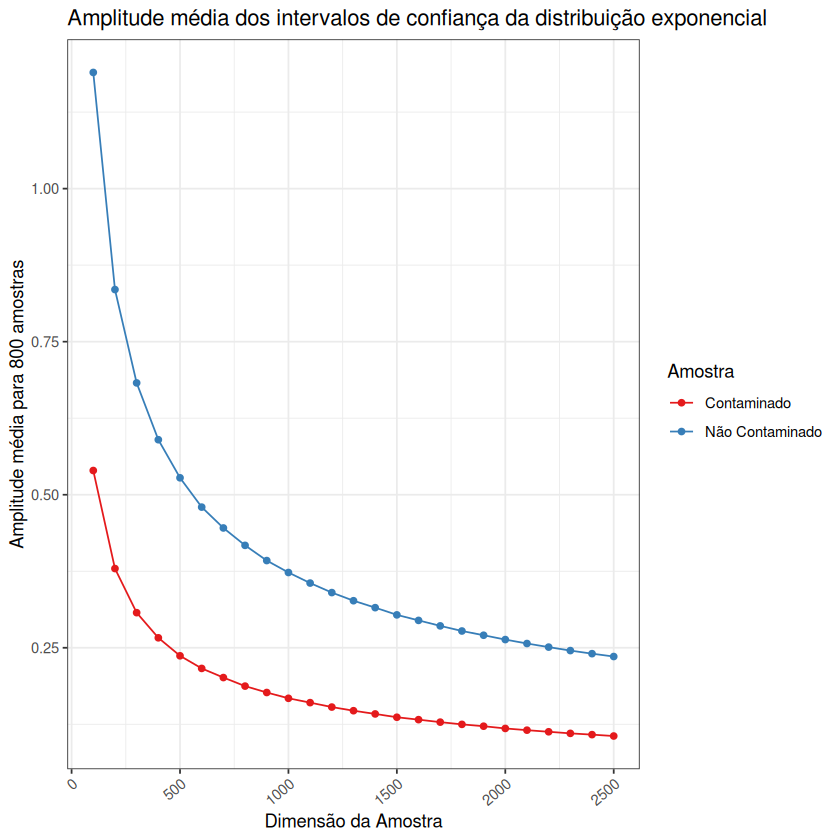

In [3]:
ggplot(df, aes(x = dimensions, y = mean_widths, colour = Amostra)) +
  geom_line() +
  geom_point() +
  labs(x = "Dimensão da Amostra", y = "Amplitude média para 800 amostras") +
  ggtitle("Amplitude média dos intervalos de confiança da distribuição exponencial") +
  theme_bw() +
  scale_colour_brewer(palette = "Set1") +
  theme(axis.text.x = element_text(angle = 40, hjust=1))